In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [21]:
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
earthquakes = pd.read_csv('earthquakes_parsed_place.csv')
covid = pd.read_csv('covid19_cases.csv')\
  .assign(date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y'))\
    .set_index('date').replace('United_States_of_America', 'USA')\
      .sort_index()['2020-01-18':'2020-09-18']

In [2]:
# Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method

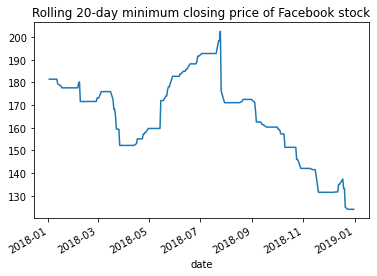

In [6]:
fb.close.rolling('20D').min().plot(title='Rolling 20-day minimum closing price of Facebook stock')

In [7]:
# Create a histogram and KDE of the change from open to close in the price of Facebook stock

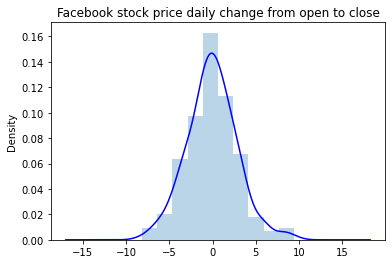

In [8]:
difference = fb.open - fb.close
ax = difference.plot(kind='hist', density=True, alpha=0.3)
difference.plot(kind='kde', color='blue', ax=ax, title='Facebook stock price daily change from open to close')

In [29]:
# Using the earthquake data, create box plots for the magnidutes of each magType used in Indonesia

mb            AxesSubplot(0.1,0.15;0.173913x0.75)
ms_20    AxesSubplot(0.308696,0.15;0.173913x0.75)
mwr      AxesSubplot(0.517391,0.15;0.173913x0.75)
mww      AxesSubplot(0.726087,0.15;0.173913x0.75)
dtype: object

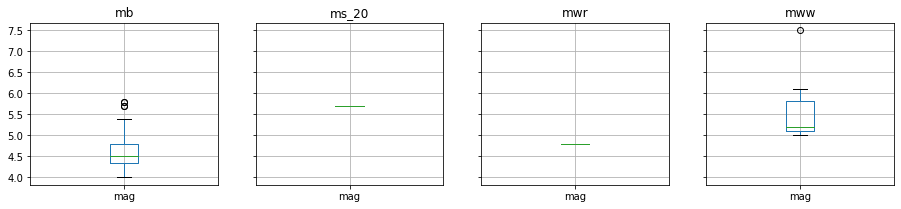

In [30]:
earthquakes.query('parsed_place == "Indonesia"')[['mag', 'magType']].groupby('magType').boxplot(layout=(1, 4), figsize=(15, 3))

In [31]:
# Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook

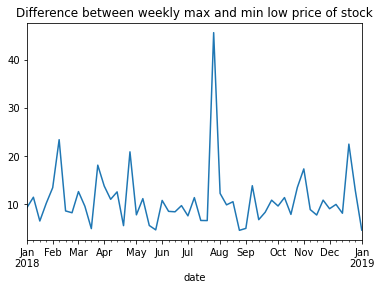

In [32]:
fb.resample('1W').agg(dict(high='max', low='min')).assign(max_change_weekly=lambda x: x.high-x.low).max_change_weekly.plot(title='Difference between weekly max and min low price of stock')

In [33]:
# Plot the 14-day moving average of the daily change in new COVID-19 cases in Brazil, China, India, Italy, Spain and USA
# First use the diff() method to calculate the day-over-day change in new cases and then use rolling() to calculate the 14-day moving average
# Make 3 subplots: one for China, one for Spain and Italy, and one for Brazil, India and USA

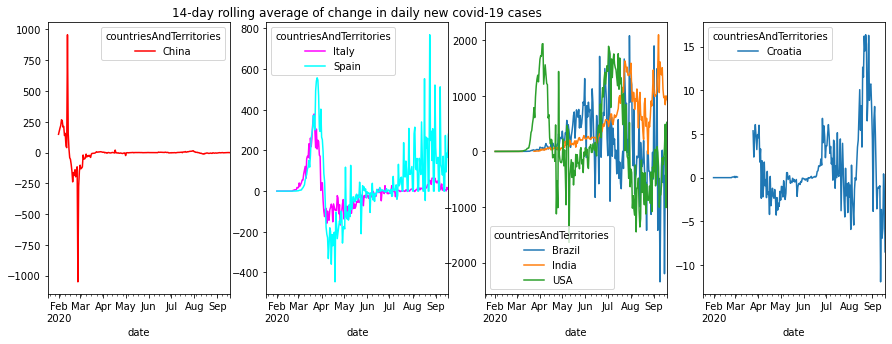

In [41]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

new_cases_rolling_average = covid.pivot_table(
  index=covid.index, columns=['countriesAndTerritories'], values='cases'
).apply(lambda x: x.diff().rolling(14).mean())

new_cases_rolling_average[['China']].plot(ax=axes[0], color='red')
new_cases_rolling_average[['Italy', 'Spain']].plot(ax=axes[1], color=['magenta', 'cyan'], title='14-day rolling average of change in daily new covid-19 cases')
new_cases_rolling_average[['Brazil', 'India', 'USA']].plot(ax=axes[2])
new_cases_rolling_average[['Croatia']].plot(ax=axes[3])

In [42]:
# Using matplotlib and padas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook stock price
# The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price
# The second subplot will be a bar plot showing the net effect this had monthly
# Color the bars by whether they are gains in the stock price (green) or drops (red)
# Modify the x-axis of the bar plot to show the three-letter abbreviation for the month

In [43]:
series = (fb.open - fb.close.shift())
monthly_effect = series.resample('1M').sum()

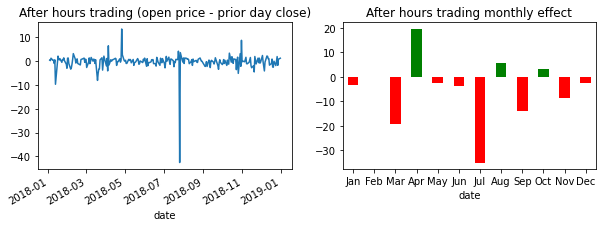

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

series.plot(ax=axes[0], title='After hours trading (open price - prior day close)')

monthly_effect.index = monthly_effect.index.strftime('%b')
monthly_effect.plot(ax=axes[1], kind='bar', title='After hours trading monthly effect', color=np.where(monthly_effect >= 0, 'g', 'r'), rot=0)